## The dataset contains activies of users through step count apps.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('dailyActivity_merged.csv')

df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [3]:
df['ActivityDate'] = df['ActivityDate'].astype('datetime64')

## Correlation between Steps and calories burn

Text(0, 0.5, 'Total Distances')

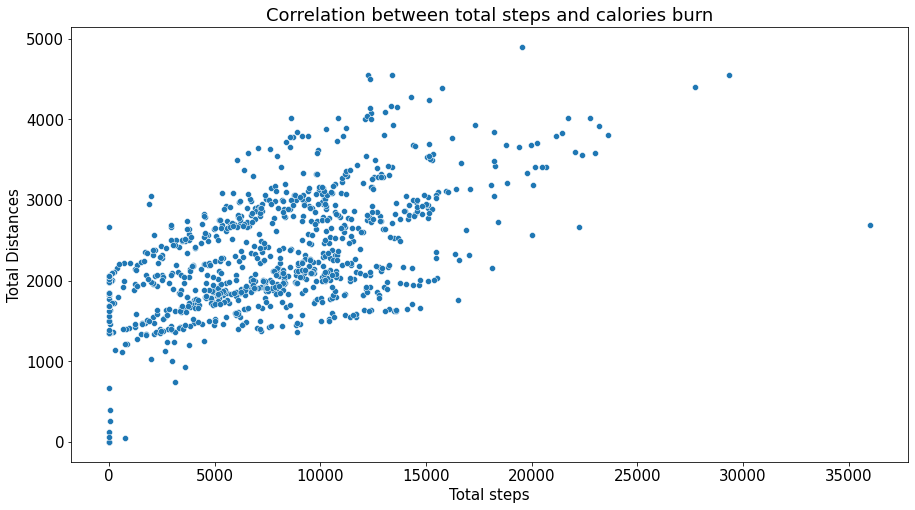

In [4]:
figure(figsize = (15,8))
plt.title('Correlation between total steps and calories burn',fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=15)
sns.scatterplot(x = 'TotalSteps', y= 'Calories', data = df)
plt.xlabel('Total steps',fontsize = 15)
plt.ylabel('Total Distances',fontsize = 15)

There are some flaws in the data where 35,000 steps burn less calories than between 25,000 and 30,000 steps. This could be due to some vigorous activities(very active minutes and distance)

## Total times between differences activity level

In [5]:
df1 = df.melt( value_vars =['VeryActiveMinutes', 'FairlyActiveMinutes','LightlyActiveMinutes', 'SedentaryMinutes'],var_name ='Activity_Level', value_name ='Minutes')

df1

,Activity_Level,Minutes
0,VeryActiveMinutes,25
1,VeryActiveMinutes,21
2,VeryActiveMinutes,30
3,VeryActiveMinutes,29
4,VeryActiveMinutes,36
...,...,...
3755,SedentaryMinutes,1174
3756,SedentaryMinutes,1131
3757,SedentaryMinutes,1187
3758,SedentaryMinutes,1127


In [6]:
dif = df1.groupby('Activity_Level').sum()['Minutes'].reset_index().sort_values(by = 'Minutes', ascending = False)
dif['Seconds'] = dif['Minutes']* 60

dif

,Activity_Level,Minutes,Seconds
2,SedentaryMinutes,931738,55904280
1,LightlyActiveMinutes,181244,10874640
3,VeryActiveMinutes,19895,1193700
0,FairlyActiveMinutes,12751,765060


### Some conversion to know the actual times in days

In [7]:
dif['Total time'] = dif['Minutes'].round().apply(pd.to_timedelta, unit='s')

dif

,Activity_Level,Minutes,Seconds,Total time
2,SedentaryMinutes,931738,55904280,10 days 18:48:58
1,LightlyActiveMinutes,181244,10874640,2 days 02:20:44
3,VeryActiveMinutes,19895,1193700,0 days 05:31:35
0,FairlyActiveMinutes,12751,765060,0 days 03:32:31


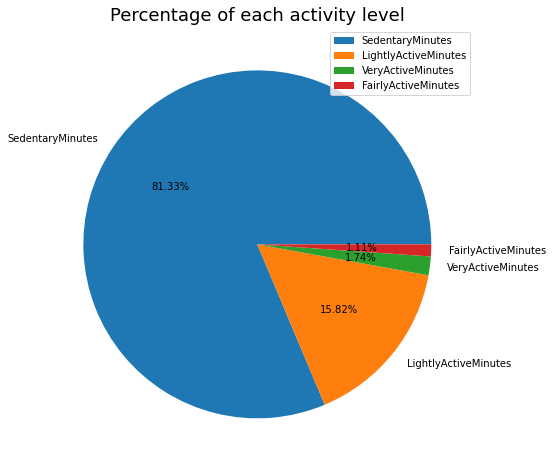

In [24]:
figure(figsize = (15,8))
plt.title('Percentage of each activity level', fontsize = 18)
plt.pie(dif['Minutes'], labels = dif['Activity_Level'],autopct='%1.2f%%')
plt.legend(labels =dif['Activity_Level'] , loc="best")
plt.tick_params(axis='both', which='major', labelsize=12)

Most Activities are Sedentary Level with 81% and 15% are Lightly Active.

Sources: https://www.medicalnewstoday.com/articles/245588#:~:text=According%20to%20the%202015%2D2020,overall%20health%2C%20and%20activity%20level

According to Medical News Today, women are likely to need between 1,600 and 2,400 calories a day, and men from 2,000 to 3,000.
Let pretend men and women take those amount of calories, see which activities level on average they need to do to burn those amount of calories.


### For women(1,600 - 2,400 calories)

In [9]:
wo = df[(df['Calories'] >=1600)&(df['Calories'] <=2400)]

cols = ['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']

df4 = wo.mean(axis = 0)[cols].reset_index()

df4.columns = ['Activity_level', 'Average Minutes']

df4['Average Minutes'] = pd.to_datetime(df4['Average Minutes'], unit='m').dt.strftime('%H:%M')

df4

C:\Users\Tuong P\AppData\Local\Temp\ipykernel_29876\961285987.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df4 = wo.mean(axis = 0)[cols].reset_index()


,Activity_level,Average Minutes
0,VeryActiveMinutes,00:11
1,FairlyActiveMinutes,00:10
2,LightlyActiveMinutes,03:15
3,SedentaryMinutes,16:58


On Average if women want to burn all the calories intake they need approximately 17 hours of Sedentary activities, 3 hours of Light Activities, approximately 10 minutes of Active and Fairly Active activities to burn the calories intake according to this data.

### For men(2,000 - 3,000 calories)

In [10]:
me = df[(df['Calories'] >=2000)&(df['Calories'] <=3000)]

df5 = me.mean(axis = 0)[cols].reset_index()

df5.columns = ['Activity_level', 'Average Minutes']

df5['Average Minutes'] = pd.to_datetime(df5['Average Minutes'], unit='m').dt.strftime('%H:%M')

df5

C:\Users\Tuong P\AppData\Local\Temp\ipykernel_29876\1774659338.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df5 = me.mean(axis = 0)[cols].reset_index()


,Activity_level,Average Minutes
0,VeryActiveMinutes,00:18
1,FairlyActiveMinutes,00:12
2,LightlyActiveMinutes,03:35
3,SedentaryMinutes,16:40


Men need approximately the same time for each activities level to burn their average calories intake per day according to the data.

## Week with the highest activities

In [17]:
df['Weekday'] = df['ActivityDate'].dt.day_name()

df6 = df.groupby('Weekday').sum()['TotalSteps'].reset_index().sort_values(by = 'Weekday',ascending = True)

df6

,Weekday,TotalSteps
0,Friday,938477
1,Monday,933704
2,Saturday,1010969
3,Sunday,838921
4,Thursday,1088658
5,Tuesday,1235001
6,Wednesday,1133906


<AxesSubplot:title={'center':'Percentage of each activity level'}, xlabel='Weekday', ylabel='TotalSteps'>

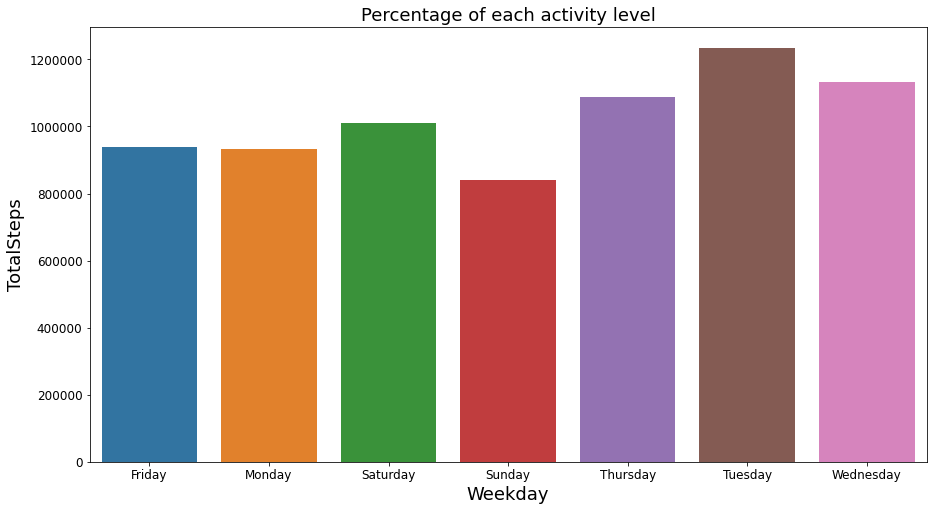

In [26]:
figure(figsize = (15,8))
plt.title('Percentage of each activity level', fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Weekday',fontsize = 18)
plt.ylabel('Total Steps', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.barplot(x = 'Weekday', y= 'TotalSteps', data = df6)

Tuesday is the most active day and Sunday is the least